# Задания для самостоятельного решения


In [10]:
import numpy as np
import pandas as pd
import scipy.stats
import numpy as np

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

∆ = 3
σ^2 = 225 
β = 0.95
n-?
∆=сигма/корень из n * Z от альфа
n = (σ / (∆ / Z))**2
Z = 1 - 0.05 / 2 = 1 - 0.025 = 0.975 Согласно таблице: 2.24

In [5]:
sigma = 15  # Стандартное отклонение (корень из дисперсии)
Z = 2.24    # Квантиль нормального распределения 
Delta = 3   # Погрешность

N = int(((sigma*Z)/Delta)**2)
N

125

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьюдента, что различия между выборками незначительны, если уровень значимости равен 0.001.

In [6]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

t , p  = stats.ttest_ind(population_men,population_women)
print("t = " + str(t))
print("p = " + str(p))


t = 1.1721770928010462
p = 0.2411259886612395


In [24]:
population_men.mean()

18.98827811558416

In [25]:
population_women.mean()

13.312452973446117

In [26]:
stats.ttest_1samp(a=population_women,popmean=population_men.mean())

Ttest_1sampResult(statistic=-3.794101433850475, pvalue=0.000148907002675382)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A505FE748>]],
      dtype=object)

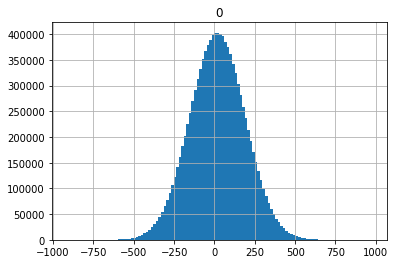

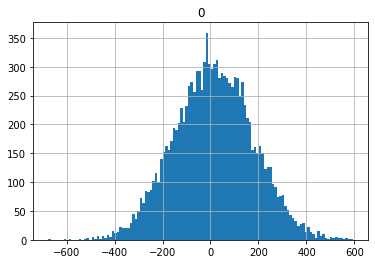

In [31]:
pd.DataFrame(population_men).hist(bins=120)
pd.DataFrame(population_women).hist(bins=120)

Существует вероятность 0,01% того, что выборочные данные для двух идентичных групп различаются. Очень маленькая вероятность, т.е. различия не значительны.

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 
∆ = 50
σ = 150 
β = 0.95
n-?
Z = 1 - 0.05 / 2 = 1 - 0.025 = 0.975 Согласно таблице: 2.24

In [34]:
sigma = 150  # Стандартное отклонение
Z = 2.24    # Квантиль нормального распределения 
Delta = 50   # Погрешность

n = int(((sigma*Z)/Delta)**2)
n

45

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течение какого-то периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05?

In [10]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations 

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [11]:
from scipy.stats import chi2_contingency

observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
print(np.array(observations))
stat, p, dof, expected = chi2_contingency(observations)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

[[25 36]
 [15 44]]
stat=2.605, p=0.107
Probably independent


Результат показывает, что данные вероятно независимы, т.е. между ними нет связи. Т.е. волшебник лжет.

In [12]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)   #Можно и так.
pvalue

0.08323639416753109

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [49]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [50]:
def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h


print(mean_confidence_interval(data, 0.90))
 

(6.074074746111319, 6.628571428571429, 7.183068111031539)


ДИ (6.07, 7.18) со средним 6.63

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [2]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


In [3]:
import scipy.stats as stats
t , p  = stats.ttest_ind(data_1,data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


In [4]:
import pandas as pd
df1 = pd.DataFrame(data_1)
df1.mean()

0    6.628571
dtype: float64

In [5]:
df2 = pd.DataFrame(data_2)
df2.mean()
#Учитывая такое большое отличия в средних, применим ttest

0    3.967742
dtype: float64

In [6]:
stats.ttest_1samp(a=df1,popmean=df2.mean())

Ttest_1sampResult(statistic=0    8.107649
dtype: float64, pvalue=array([1.87198119e-09]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002326A590348>]],
      dtype=object)

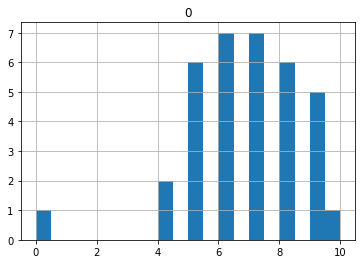

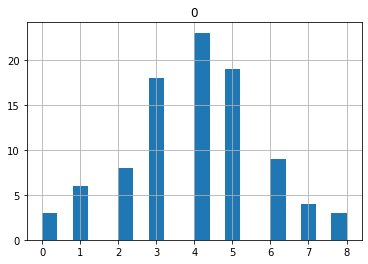

In [8]:
df1.hist(bins=20)
df2.hist(bins=20)

Выборки принадлежат одному множеству.

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Не очень хорошее решение проверять распределение уровнем значимости. Сначала нужно построить график и понять, каково распределение, потом нормализовать его, а затем уже можно проверять гипотезы.

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [11]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002326B06B948>]],
      dtype=object)

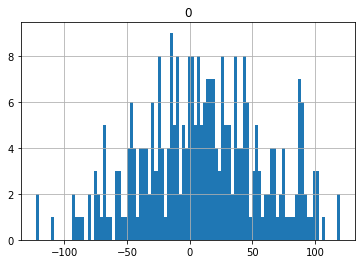

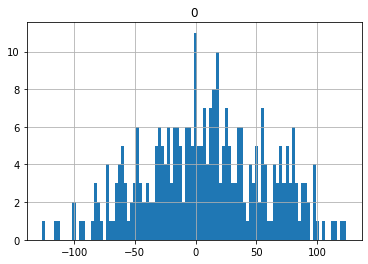

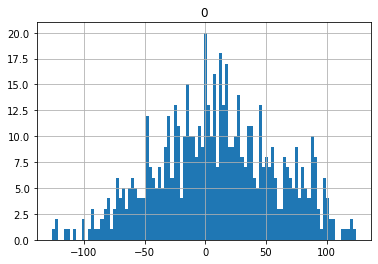

In [22]:
pd.DataFrame(A).hist(bins=100)
pd.DataFrame(B).hist(bins=100)

all_samples=np.concatenate((A,B))
all_samples.mean()
pd.DataFrame(all_samples).hist(bins=100)

In [21]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

Уровень p value = 0.74, что означает, что различия незначимы, случайны.

Различия были бы значимы при p value <= 0.049.